<a href="https://colab.research.google.com/github/sh4r-KO/SchoolWork/blob/main/Kmeans_CABROL_Aguirre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Use case 1: K-means Clustering of Drivers
In the first use case, we group drivers into several clusters based on their driving speed
and distance, using K-means clustering technique.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch

import plotly.express as px
import plotly.graph_objects as go


df = pd.read_csv("Driver_data.csv")
df.head(10)

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [ ]:
print(df.head())
print(df.columns)
print(df.isnull().sum())
print(df.dtypes)

    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24                28
1  3423313212             52.53                25
2  3423313724             64.54                27
3  3423311373             55.69                22
4  3423310999             54.58                25
Index(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'], dtype='object')
Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64
Driver_ID             int64
Distance_Feature    float64
Speeding_Feature      int64
dtype: object


#### elbow, silouhette score and k-means clustering plots

In the following code we first use the elbow method and the silouhette score to determine the optimal K value. In these graph, we can see that the optimal K in both cases is 2. wich is coherent when you see the simple data that is provided.

we then plot the cluster using 2 as k, and we see this marvelous graph, where 2 cluster makes perfect sense.

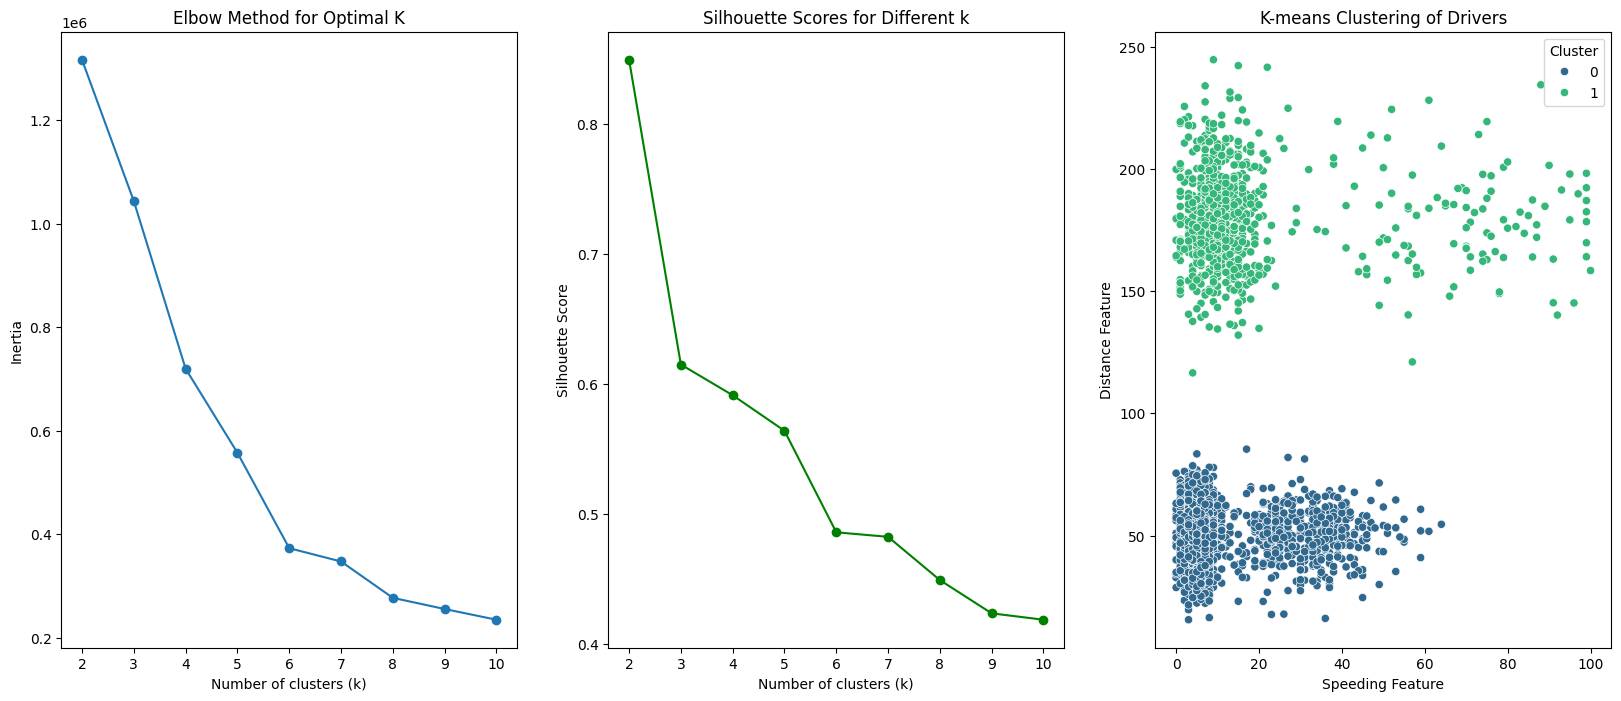

In [ ]:
#@title ...
df = pd.read_csv("Driver_data.csv")


X = df[['Distance_Feature', 'Speeding_Feature']]

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sil_score = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    sil_score.append(silhouette_score(X, cluster_labels))



fig, ax = plt.subplots(1, 3)

fig.set_figheight(8)
fig.set_figwidth(20)


ax[0].plot(k_values[1:], inertia[1:], '-o')
ax[0].set_title('Elbow Method for Optimal K')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Inertia')

ax[1].plot(range(2, 11), sil_score, '-o', color='green')
ax[1].set_title('Silhouette Scores for Different k')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')


sns.scatterplot(y='Distance_Feature', x='Speeding_Feature', hue='Cluster', data=df, palette='viridis')
ax[2].set_title('K-means Clustering of Drivers')
ax[2].set_ylabel('Distance Feature')
ax[2].set_xlabel('Speeding Feature')
ax[2].legend(title='Cluster')

plt.show()

### Use case 2: K-means & AHC Clustering of Mall Customers


**In the second use case, we cluster mall customers based on information related to their
genre, age, income and spending score, using both K-means and Agglomerative
Clustering techniques.**


Explore the implementation of k-means and agglomerative hierarchical clustering algorithms
to solve this problem starting by loading the dataset, making some exploratory analysis, apply
clustering technique on your data, use elbow and/or silhouette methods to identify the optimal
k for kmeans, visualize your clustered datapoints, try to get insights on the generated clusters.


In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


in the 2 graph below we can see that there are 2 good potential optimal k : 4 and 7. I chose to pick 7, because i believe that it is more unbiased.

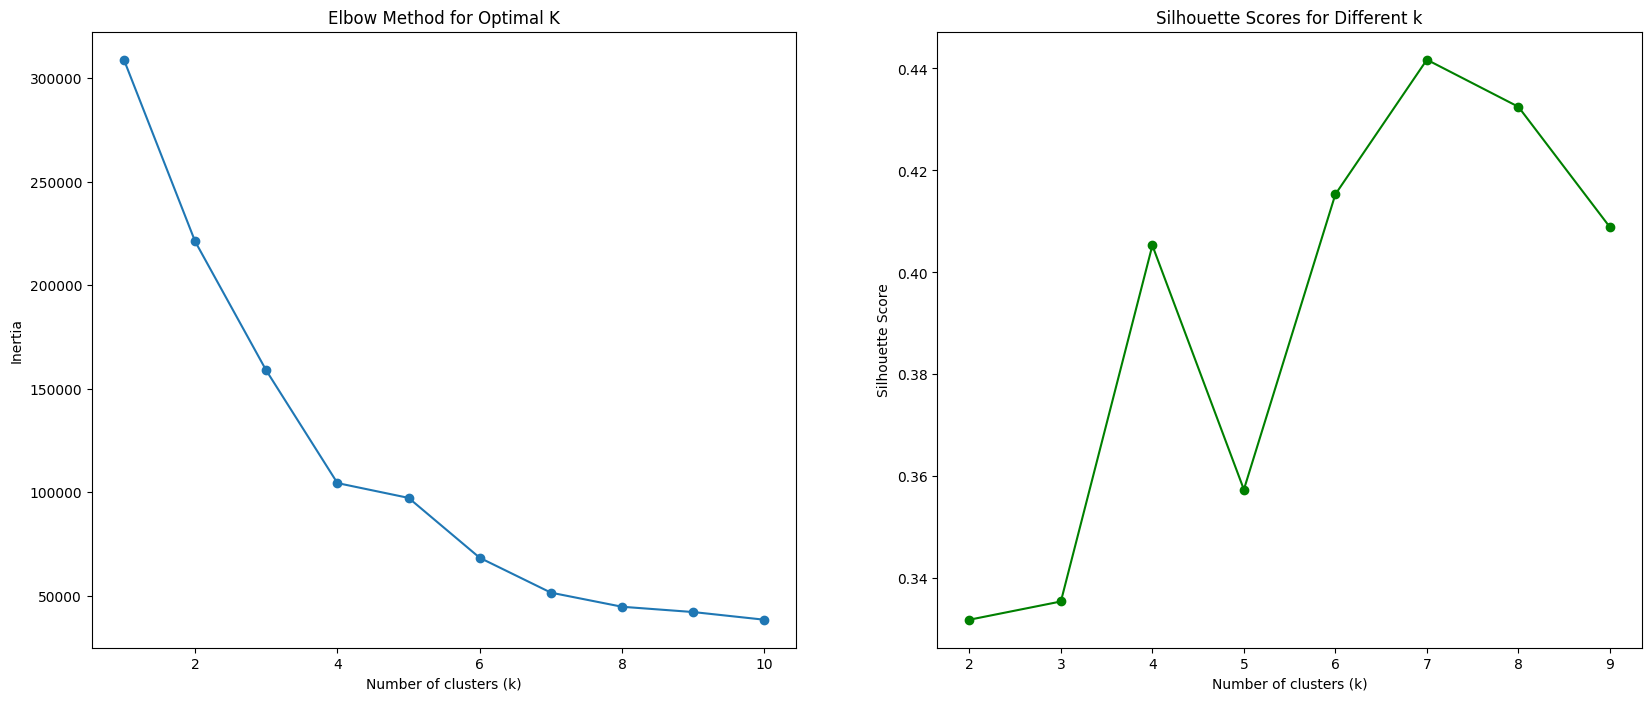

In [ ]:
#@title ...
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]



inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

fig, ax = plt.subplots(1, 2)

fig.set_figheight(8)
fig.set_figwidth(20)

ax[0].set_title('Elbow Method for Optimal K')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].plot(k_values, inertia, '-o')

ax[1].set_title('Silhouette Scores for Different k')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].plot(range(2, 10), silhouette_scores, '-o', color='green')

plt.show()

in the clustering graph we see here, we can discover our 7 cluster. however, there is an issue. 2 of these cluster are grouped up in one single mess in the middle, these are the cluster 0 and 1.

to find the explication, i decided to investigae the other feature not presented in this graph : Age and Gender.




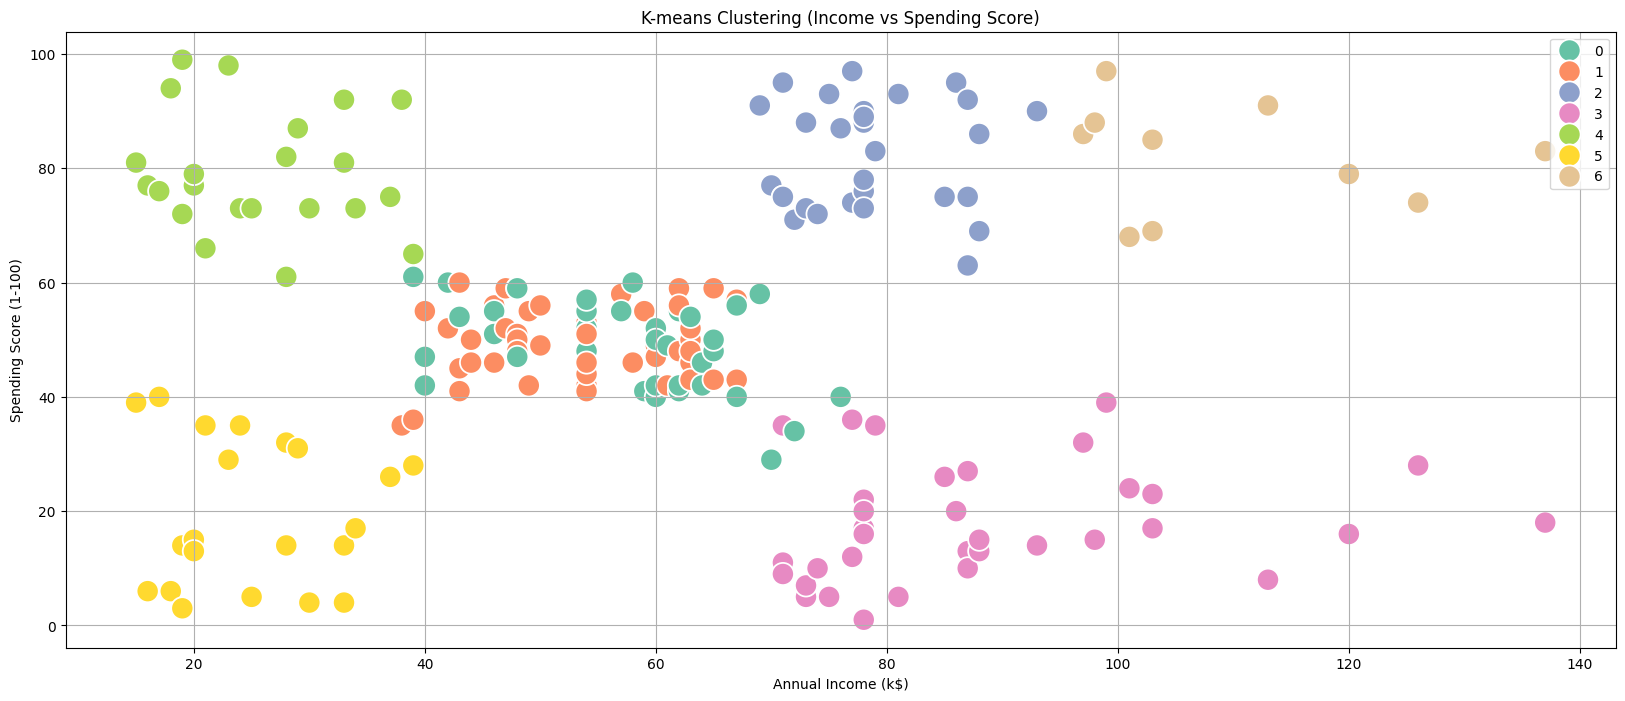

In [ ]:
#@title ...
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=1000)#https://stackoverflow.com/questions/47680537/k-means-clustering-doesnt-find-all-clusters-in-data#:~:text=kmeans(%2C%20nstart%20%3D%201000)

df['KMeans_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(20, 8))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='Set2',s=256)

plt.title('K-means Clustering (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#@title Explanation of the coexistence of clusters 0-1
meanAge_clust_0 = df[(df.KMeans_Cluster == 0)]['Age'].mean()
meanAge_clust_1 = df[(df.KMeans_Cluster == 1)]['Age'].mean()

meanGender_clust_0 = df[(df.KMeans_Cluster == 0)]['Genre'].mean()*100
meanGender_clust_1 = df[(df.KMeans_Cluster == 1)]['Genre'].mean()*100

print(f'Average age for cluster 0: \033[1m{meanAge_clust_0:.2f}\033[0m')
print(f'Average age for cluster 1: \033[1m{meanAge_clust_1:.2f}\033[0m')
print("\n")
print(f'Average gender for cluster 0: \033[1m{meanGender_clust_0:.2f}\033[0m')
print(f'Average gender for cluster 1: \033[1m{meanGender_clust_1:.2f}\033[0m')
print("\n")
print("We can see that the coexistence of the two clusters in the middle is justified by a significant difference in the average age.")
print("Since age is not visualized in the graph above, it's easy to overlook this crucial information.")
print("\n")
print(f"However the difference of Gender represetnation in these two cluser is {meanGender_clust_1-meanGender_clust_0:.2f}%, wich isn't sufficient to explain the coexistence of the clusters.")
print("\n")
print("To help us see these two clustering, we choose to show the k-means clustering as a 3D scatter plot we found on the internet")

Average age for cluster 0: 27.00
Average age for cluster 1: 56.16


Average gender for cluster 0: 34.21
Average gender for cluster 1: 44.44


We can see that the coexistence of the two clusters in the middle is justified by a significant difference in the average age.
Since age is not visualized in the graph above, it's easy to overlook this crucial information.


However the difference of Gender represetnation in these two cluser is 10.23%, wich isn't sufficient to explain the coexistence of the clusters.


To help us see these two clustering, we choose to show the k-means clustering as a 3D scatter plot we found on the internet


In [ ]:
#@title ...
#source & inspiration of following code
#https://www.youtube.com/watch?v=CB3h2KE_-C4

optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=1000)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

fig = go.Figure()

# Add a scatter plot for each cluster
for cluster in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Annual Income (k$)'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Age'],
        mode='markers',
        marker=dict(size=8),
        name=f'Cluster {cluster}'

    ))

# Update layout for better visuals
fig.update_layout(
    title='K-means Clustering (Income vs Spending Score vs Age)',
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(title="Clusters")
)

fig.show()

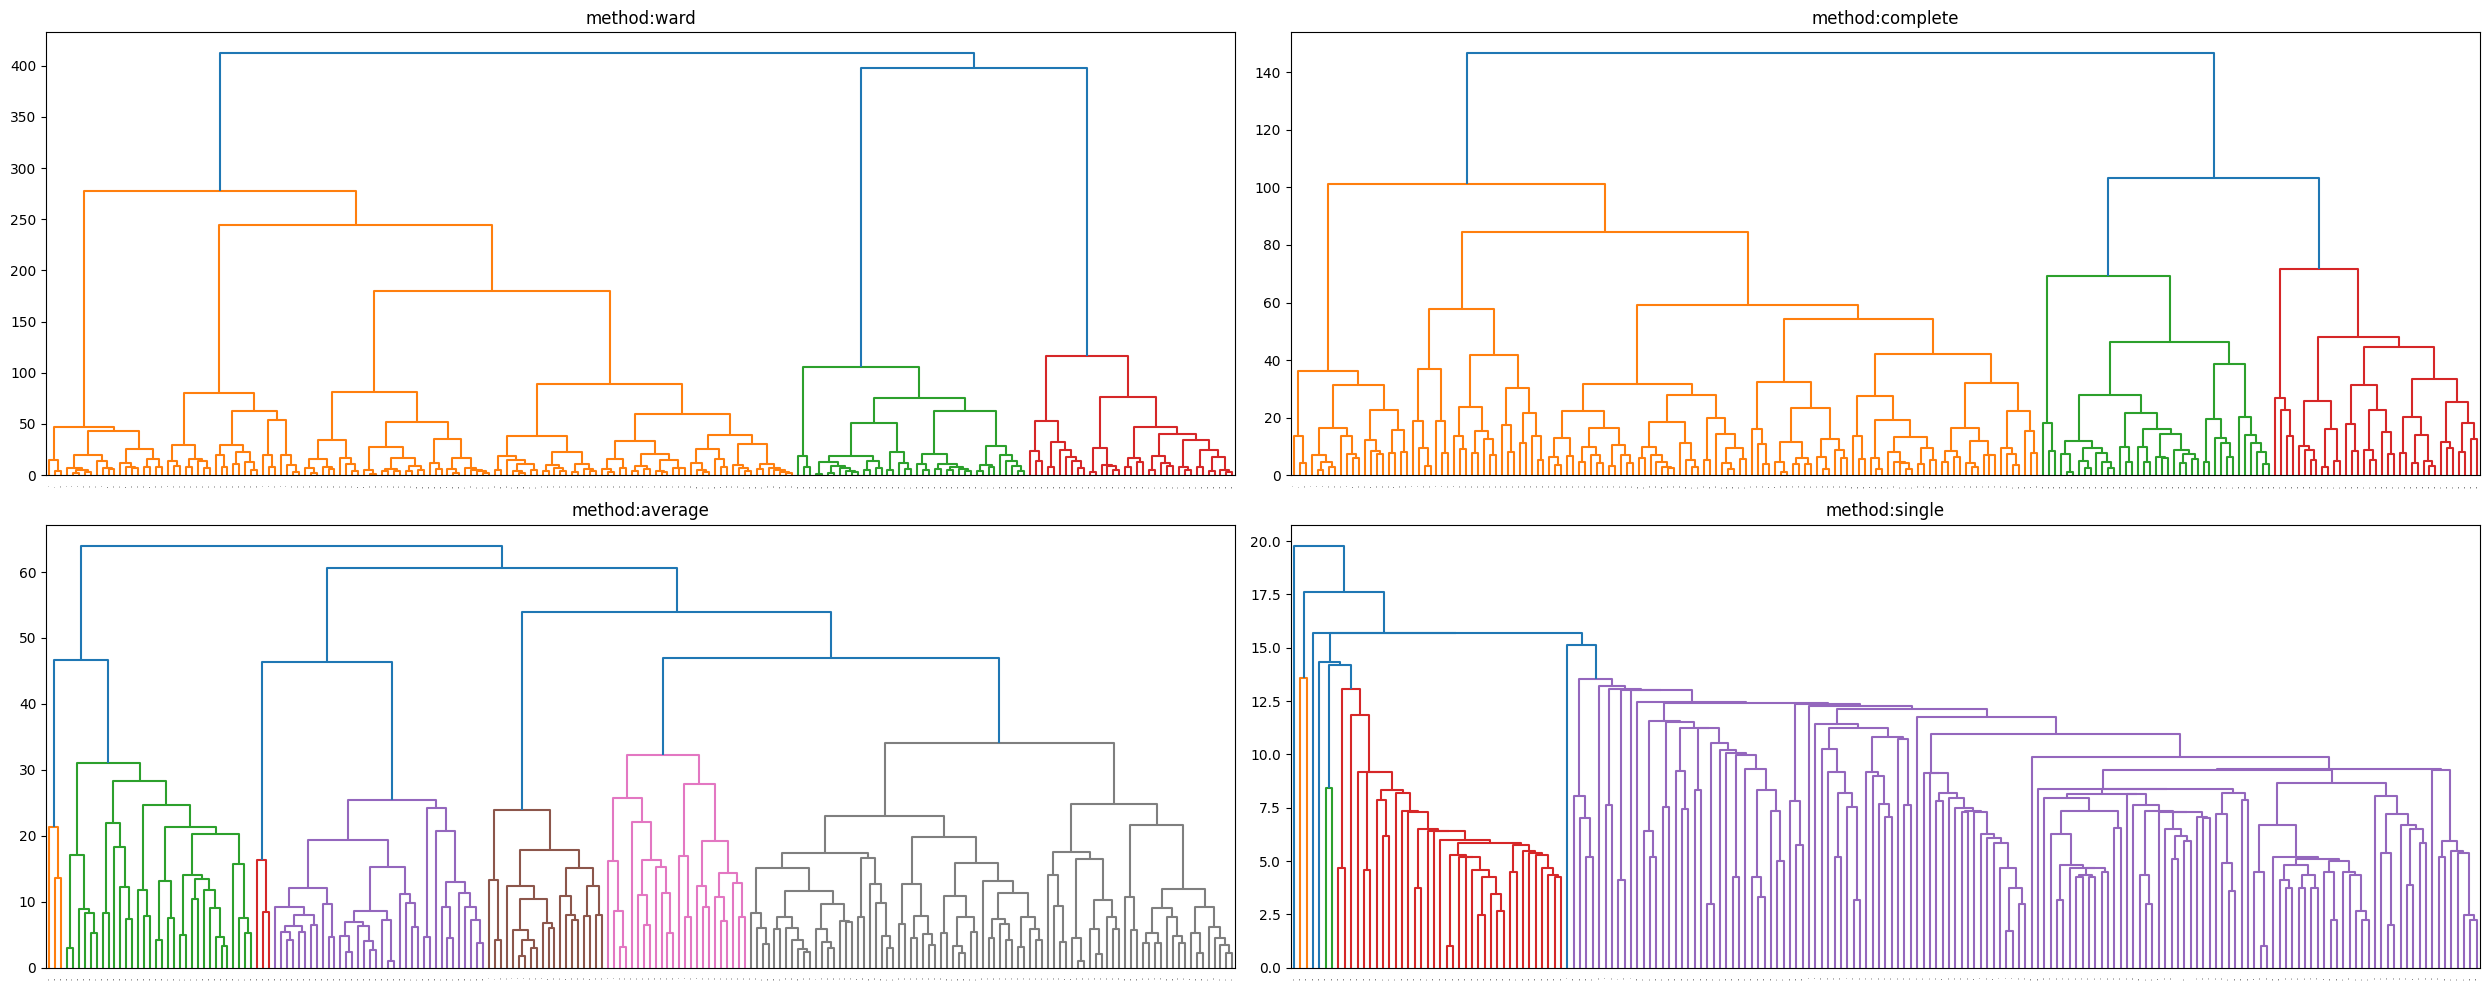

In [ ]:
#@title ...
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=False, figsize=(25, 10))
methods = ['ward','complete','average','single']

hierarchy.dendrogram(sch.linkage(X, method=methods[0]), truncate_mode="level", ax=ax1, show_leaf_counts=False,leaf_font_size=0)
ax1.set_title(f"method:{methods[0]}")

hierarchy.dendrogram(sch.linkage(X, method=methods[1]), truncate_mode="level", ax=ax2, show_leaf_counts=False,leaf_font_size=0)
ax2.set_title(f"method:{methods[1]}")

hierarchy.dendrogram(sch.linkage(X, method=methods[2]), truncate_mode="level", ax=ax3, show_leaf_counts=False,leaf_font_size=0)
ax3.set_title(f"method:{methods[2]}")

hierarchy.dendrogram(sch.linkage(X, method=methods[3]), truncate_mode="level", ax=ax4, show_leaf_counts=False,leaf_font_size=0)
ax4.set_title(f"method:{methods[3]}")

plt.tight_layout()
plt.show()

- Ward's method most closely matches the k-means clustering with k=7, as it produces compact, variance-minimized clusters.
- Complete and Average linkage provide moderate alternatives, but their cluster compactness and distinctiveness are not as robust as Ward's.

- Single linkage is the least aligned with k=7 because of its tendency to create elongated and poorly compact clusters.

This analysis suggests that Ward's method is the best hierarchical clustering approach when comparing to k-means for this dataset.

we can have a better view of the different branches in the graph seen below, we can see at p=2 8 branches, but we can supposedely sum the bottom left 2 branches as one, and deduce the 7 cluster from the 8 branches.








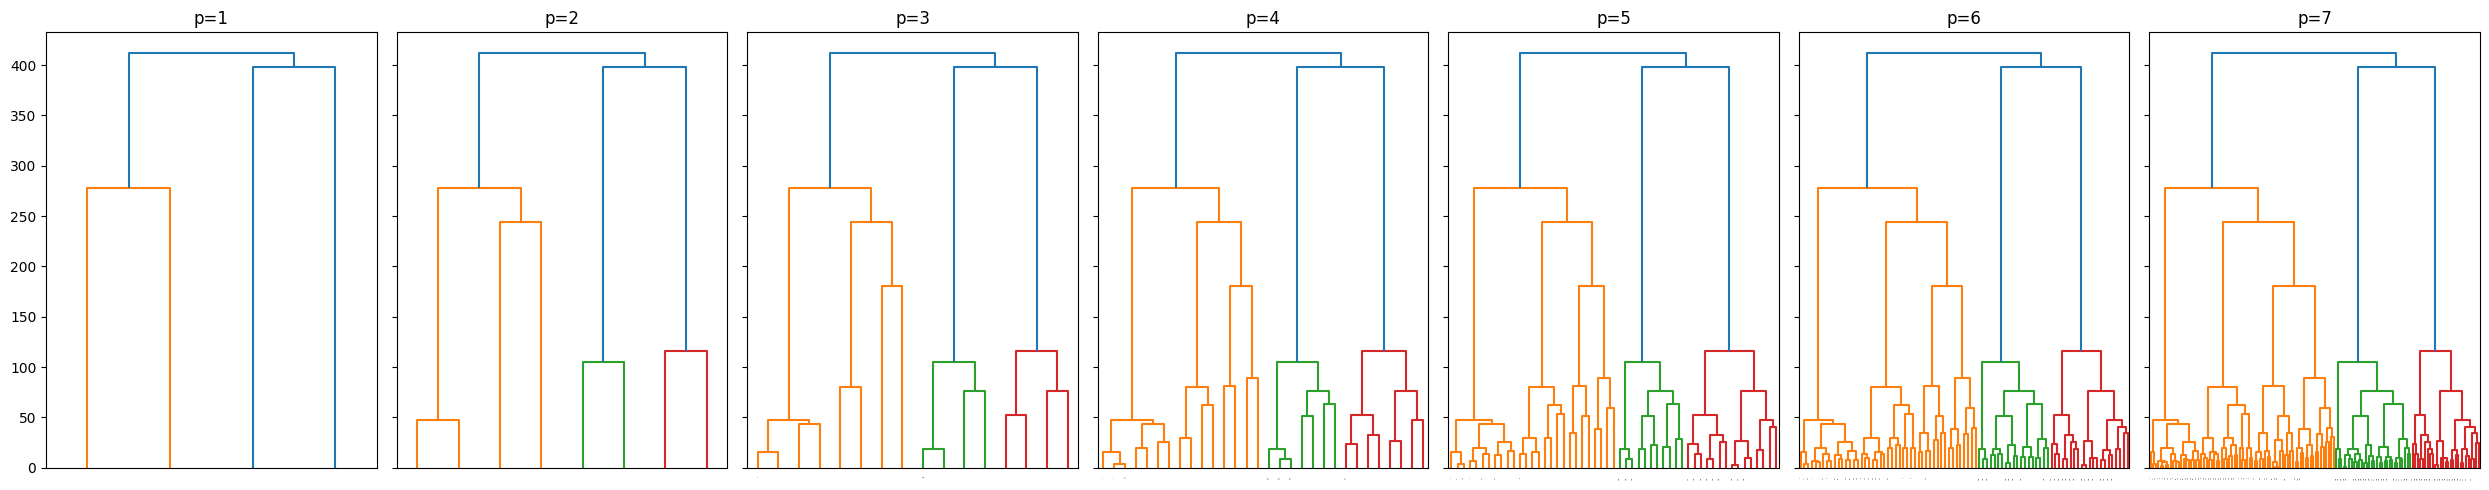

In [ ]:
#@title ascending levels of the dendrogram for hierarchical Clustering using ward




fig, ax_rows = plt.subplots(ncols=7, nrows=1, sharey=True, figsize=(25, 5))
p=1
for ax_row  in ax_rows:

    hierarchy.dendrogram(sch.linkage(X, method='ward'), truncate_mode="level", p=p, ax=ax_row, show_leaf_counts=False,leaf_font_size=0)
    ax_row.set_title(f"p={p}")
    p = p+1

plt.tight_layout()
plt.show()